## TASK 5
### SALES PREDICTION USING PYTHON

Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

DOWNLOAD DATASET FROM HERE: https://www.kaggle.com/datasets/bumba5341/advertisingcsv





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## General data analysis


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [14]:
data.shape

(200, 4)

In [15]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Analysis of variables and the relationship between them

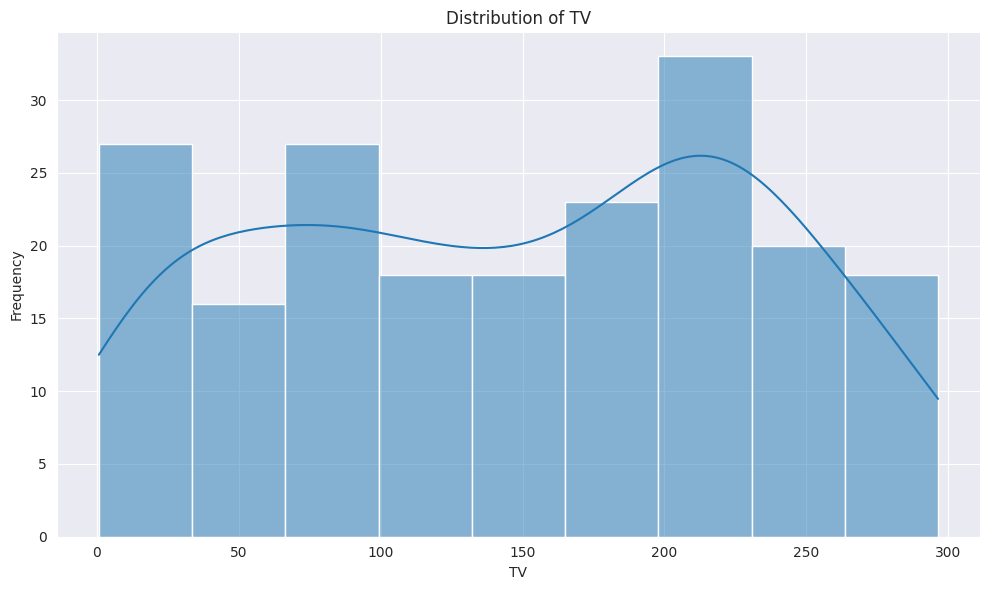

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(x='TV', data=data, kde=True)
plt.title('Distribution of TV')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

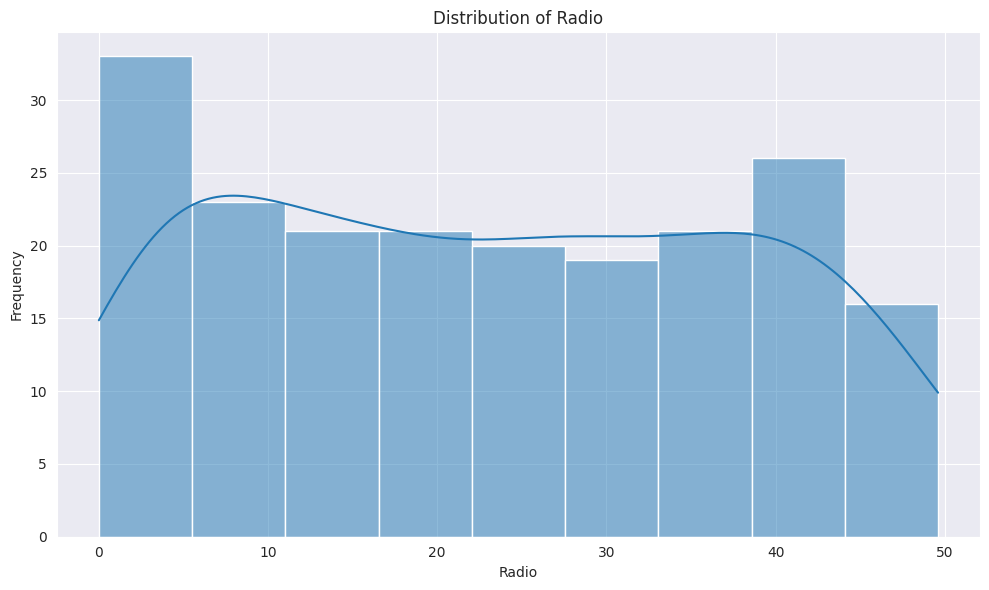

In [29]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(x='Radio', data=data, kde=True)
plt.title('Distribution of Radio')
plt.xlabel('Radio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

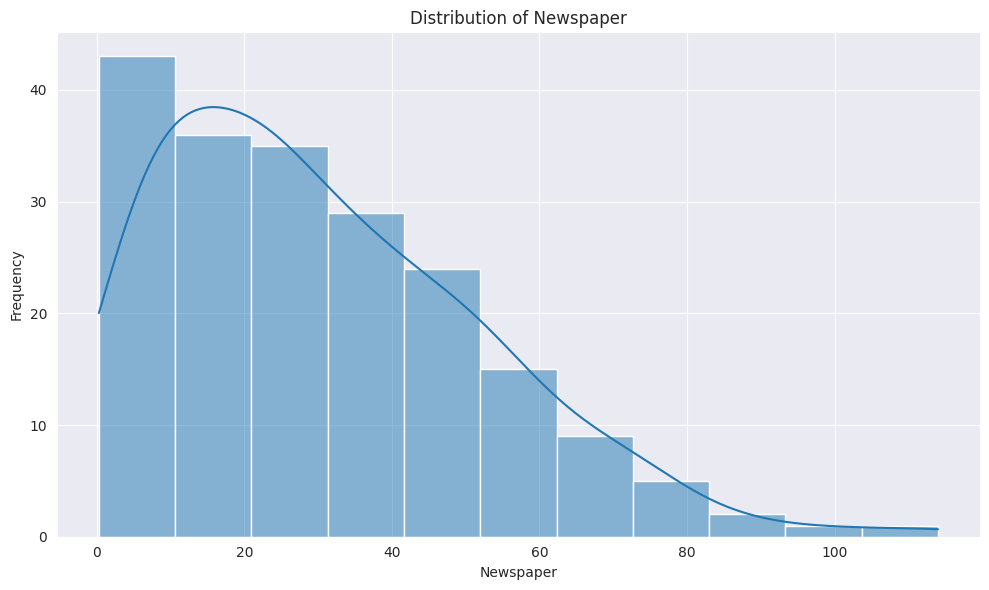

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.histplot(x='Newspaper', data=data, kde=True)
plt.title('Distribution of Newspaper')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

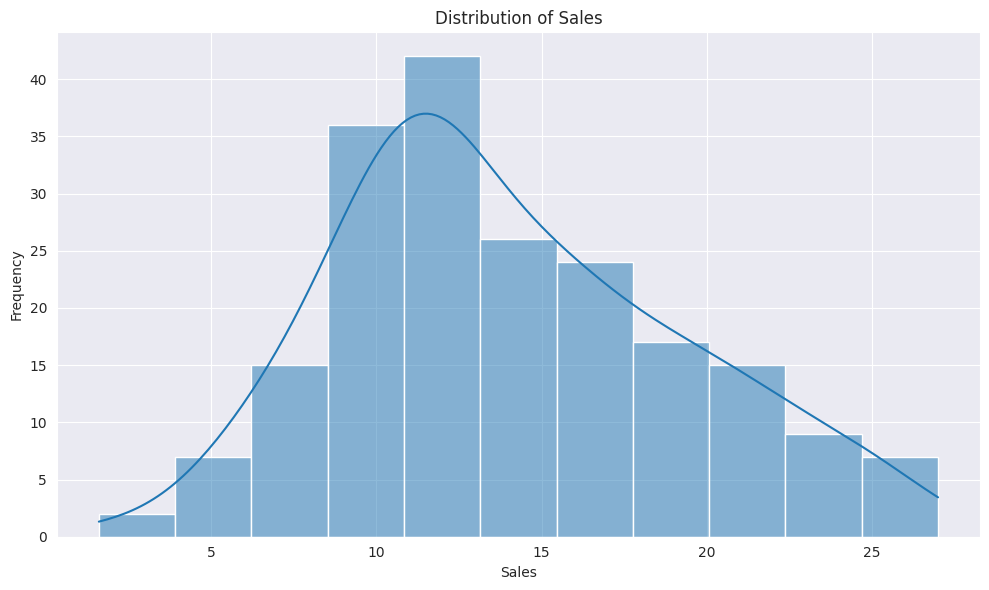

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(x='Sales', data=data, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

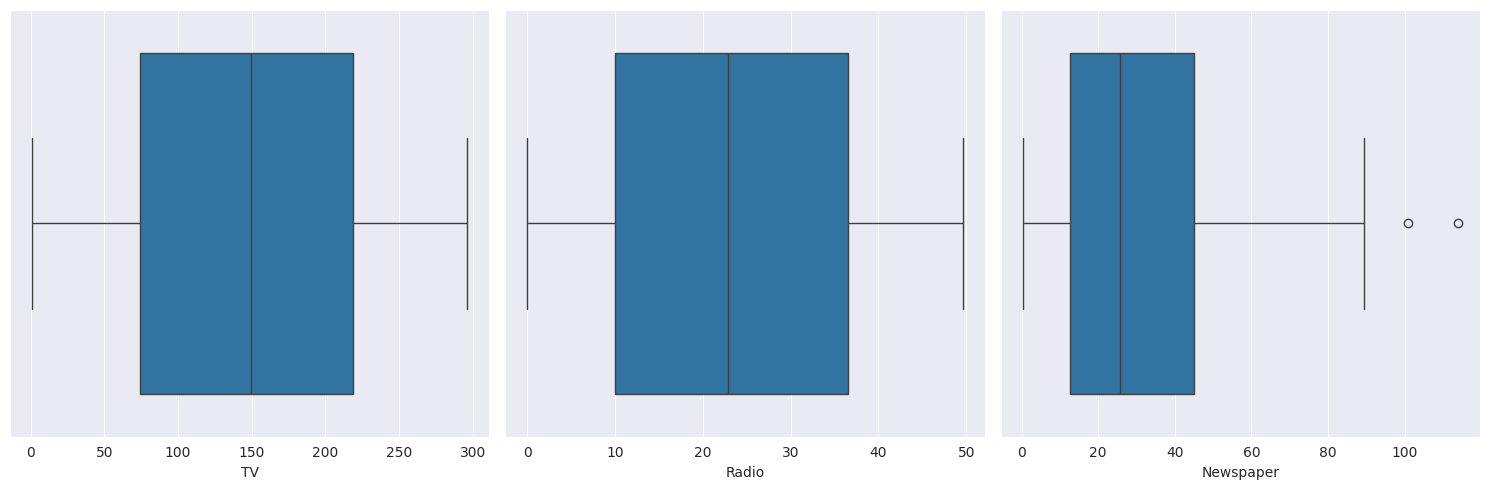

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x='TV', data=data, ax=axs[0])
sns.boxplot(x='Radio', data=data, ax=axs[1])
sns.boxplot(x='Newspaper', data=data, ax=axs[2])
plt.tight_layout()
plt.show()

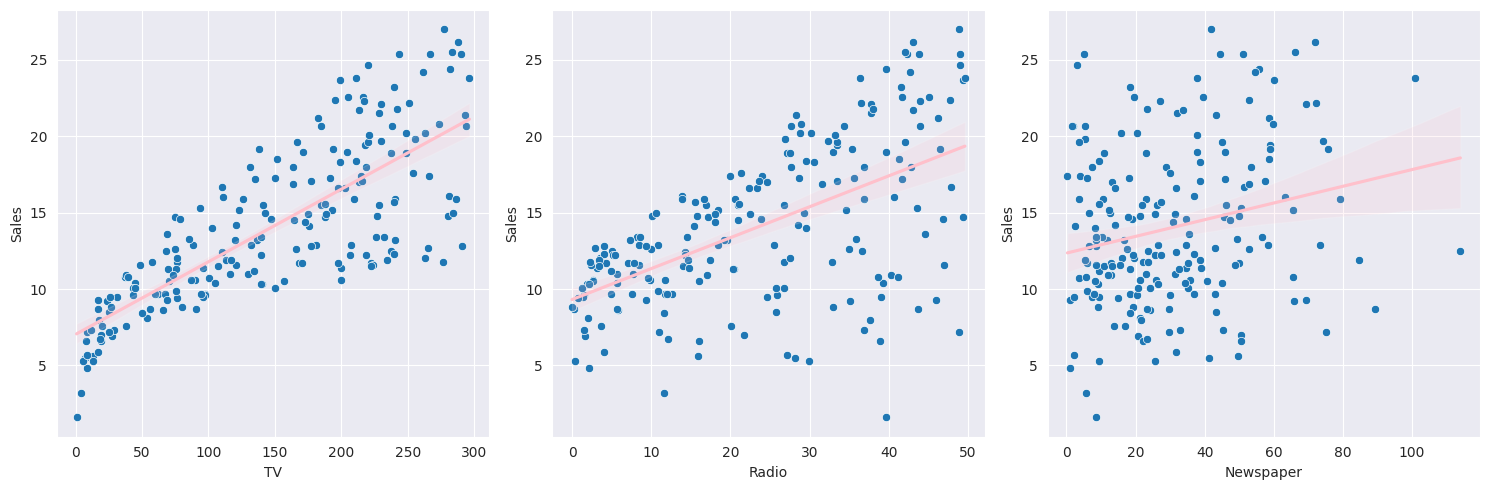

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(y='Sales', x='TV', data=data, ax=axs[0])
sns.regplot(y='Sales', x='TV', data=data, ax=axs[0], scatter=False, color='pink')
sns.scatterplot(y='Sales', x='Radio', data=data, ax=axs[1])
sns.regplot(y='Sales', x='Radio', data=data, ax=axs[1], scatter=False, color='pink')
sns.scatterplot(y='Sales', x='Newspaper', data=data, ax=axs[2])
sns.regplot(y='Sales', x='Newspaper', data=data, ax=axs[2], scatter=False, color='pink')
plt.tight_layout()
plt.show()

In [46]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


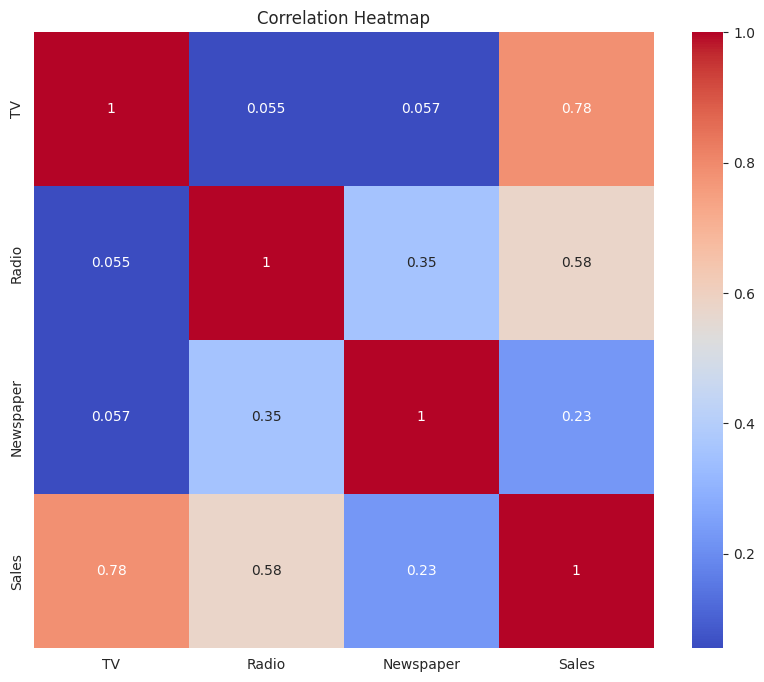

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Based on the correlation table provided:

1. TV advertising has the strongest positive correlation with sales (0.782), indicating that as TV advertising spending increases, sales tend to increase as well.
2. Radio advertising also shows a positive correlation with sales, although slightly weaker than TV advertising (0.576). This suggests that higher spending on radio advertising is associated with higher sales.
3. Newspaper advertising has the weakest positive correlation with sales among the three advertising mediums (0.228). This implies that while there is some association between newspaper advertising spending and sales, it is not as strong as the associations observed for TV and radio advertising.

Among the advertising mediums, radio advertising has the strongest positive correlation with newspaper advertising (0.354), followed by TV advertising (0.054). This indicates a moderate association between radio and newspaper advertising spending.

In conclusion, based on the correlations observed:

*   TV advertising appears to have the greatest influence on sales.
Radio advertising also has a notable impact on sales, although slightly less than TV advertising.
*   Newspaper advertising has the weakest influence on sales among the three mediums, but there is still some positive association.
*   The correlations between the different advertising mediums suggest some degree of interplay between them, with radio advertising showing the strongest association with newspaper advertising.

## Preparing data for model training

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Sales', axis=1), data['Sales'], test_size=0.2, random_state=42)

In [51]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

## Model training

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR()
}

In [54]:
scores = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    scores.append({'model': model, 'MSE': mse, 'R2': r2})

In [55]:
data_scores = pd.DataFrame(scores)
data_scores

,model,MSE,R2
0,LinearRegression(),3.174097,0.899438
1,DecisionTreeRegressor(),1.779750,0.943614
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.576690,0.981729
3,SVR(),4.006045,0.873080


In [65]:
best_model = data_scores.sort_values('R2', ascending=False)['model'].iloc[0]
best_model

RandomForestRegressor()

In [66]:
best_model.predict(X_test)

array([17.847, 21.642, 20.377,  6.501, 23.283, 13.013, 22.508,  9.596,
       11.861, 15.539,  7.462,  9.059, 12.192,  4.476, 10.59 , 12.604,
        6.428, 16.494, 11.401, 19.549, 19.985, 12.504, 10.192, 22.266,
       10.11 ,  8.982, 22.398, 12.692, 10.183,  5.099, 11.587, 11.002,
       22.407,  8.242, 15.325, 20.296, 12.263, 20.409, 12.338,  7.557])

# Analysis and Conclusion

1. **Data Analysis**:
   - The dataset is loaded and examined for its structure, missing values, and statistical summaries.
   - Visualizations like histograms, box plots, and scatter plots are used to understand the distributions and relationships between variables.

2. **Correlation Analysis**:
   - A correlation heatmap is generated to understand the relationships between different advertising mediums (TV, Radio, Newspaper) and sales.
   - TV advertising exhibits the strongest positive correlation with sales, followed by Radio advertising, while Newspaper advertising has the weakest correlation.

3. **Model Training**:
   - Four regression models (Linear Regression, Decision Tree Regression, Random Forest Regression, Support Vector Regression) are trained using the data.
   - The dataset is split into training and testing sets for model evaluation.

4. **Model Evaluation**:
   - Each trained model is evaluated using Mean Squared Error (MSE) and R-squared (R2) metrics on the test set.
   - The Random Forest Regression model with default parameters achieved the highest R2 score of 0.982 and the lowest MSE, indicating its superior performance in predicting sales.

5. **Conclusion**:
   - The analysis indicates that the Random Forest Regression model outperformed other models in predicting sales based on advertising expenditures.
   - This model can be utilized for future sales prediction tasks, providing valuable insights for business decision-making processes.